In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
#we will be predicting only present responses spending kind
data_present=pd.read_excel('modelling_present_KNN.xlsx')

In [52]:
data_present.head()

,Unnamed: 0,Age,Income,Emp_stat_Present,Gender,Marital_status,Loc,Notice_things_Present,All_angles_Present,Sincere_prod_Present,...,Digital_content_Present,Active_Investor_Present,Edu_instit_fee_Present,Change_in_data_consumption,Spend_on_gadgets_Present,Spend_on_Luxury_Present,Track_Household_exp_Present,Domestic_help_Present,Spending_kind_Present,ID
0,0,5,2,0,0,1,1,5,5,5,...,3,2,3,1,4,1,2,1,1,1
1,1,0,3,3,0,0,1,1,5,5,...,1,5,4,2,3,2,0,2,1,3
2,2,4,1,4,0,1,1,5,5,4,...,3,3,3,1,3,2,2,0,0,4
3,3,0,0,2,1,0,1,3,4,4,...,3,3,4,2,4,3,1,0,1,5
4,4,1,0,1,1,0,1,4,5,5,...,2,3,4,2,3,2,2,0,0,6


In [53]:
#miscellanous features were dropped which were not required for modelling.
data_present.drop(columns=['Unnamed: 0','ID'],inplace=True)

In [54]:
#statisctical test to identify which features have significant relationship with the target variable
#16 features were found to have significant relationship and these features have been selected as model was perfoming well with these.
from scipy.stats import chi2_contingency

sigini_vars=[]

for i in data_present.columns:
    #contingency table
    table=pd.crosstab(index=data_present[i],columns=data_present['Spending_kind_Present'])
    
    #chi-sqaure goodness of fit test
    stats,p_value,dof,ideal_exp=chi2_contingency(table)
    
    if p_value<0.05:
        sigini_vars.append(i)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,confusion_matrix

In [98]:
#dividing the independent and dependent variables, with significant features choosen
#All other combinations were tried and these significant features model was the best out of all
X=data_present[sigini_vars].drop(columns='Spending_kind_Present')
y=data_present['Spending_kind_Present']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Base model : Decision Tree

In [88]:
DT_pre=DecisionTreeClassifier()

In [90]:
#cross_val_training score
kfold=KFold(shuffle=True,n_splits=3,random_state=0)
scores=cross_val_score(DT_pre,X_train,y_train,cv=kfold,scoring='f1_weighted')

In [91]:
print(scores.mean())
print(scores.var())
#bias error of 40% and variance error of 0.7%, which says model is performing decent and consistent

0.6043592036612719
0.007840511314515389


In [92]:
DT_pre.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
pred_pre=DT_pre.predict(X_test)
print(classification_report(y_test,pred_pre))
print('-'*40)
print(confusion_matrix(y_test,pred_pre))

              precision    recall  f1-score   support

           0       0.38      0.45      0.41        40
           1       0.69      0.66      0.67        83
           2       0.38      0.25      0.30        12

    accuracy                           0.56       135
   macro avg       0.48      0.45      0.46       135
weighted avg       0.57      0.56      0.56       135

----------------------------------------
[[18 21  1]
 [24 55  4]
 [ 5  4  3]]


### Final model: Gradient Boost Algorithm

- Other models such as KNN, RF were performed and results were compared.
- SMOTE was also applied on the data and performance was compared.
- Gradient boost algorithm with default estimator as DT on imbalance data performed well out of all models.
- As we have differently imputed datasets, modelling was performed on all those datasets and very close results were noticed.
- Gradient boost was best model for all three datasets, and below is the comparision of all three models.


MODELS USED:
- Decision Tree
- KNN
- Random Forest
- Boosted Decision Tree
- Boosted Random forest
- Gradient Boost

#### Knn imputed dataset

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
GBoost_signi=GradientBoostingClassifier(n_estimators=50)

In [145]:
#cross_val_training score
kfold=KFold(shuffle=True,n_splits=3,random_state=0)
scores=cross_val_score(GBoost_signi, X_train, y_train,cv=kfold,scoring='f1_weighted')

In [66]:
print(scores.mean())
print(scores.var())

0.600127107311022
0.0007789432724900916


In [146]:
GBoost_signi.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [13]:
pred_GBoost_signi = GBoost_signi.predict(X_test) 

print(classification_report(y_test,pred_GBoost_signi)) 
print('-'*40) 
print(confusion_matrix(y_test,pred_GBoost_signi)) 

              precision    recall  f1-score   support

           0       0.53      0.39      0.45        44
           1       0.67      0.81      0.73        81
           2       0.50      0.20      0.29        10

    accuracy                           0.63       135
   macro avg       0.57      0.47      0.49       135
weighted avg       0.61      0.63      0.61       135

----------------------------------------
[[17 27  0]
 [13 66  2]
 [ 2  6  2]]


#### modelling imputation dataset

In [29]:
data_present2=pd.read_csv('Present_Encoded_Imputed.csv')

In [30]:
from scipy.stats import chi2_contingency 

sigini_vars2=[]

for i in data_present2.columns:
    #contingency table
    table=pd.crosstab(index=data_present2[i],columns=data_present2['Spending_kind_Present'])
    
    #chi-sqaure goodness of fit test
    stats,p_value,dof,ideal_exp=chi2_contingency(table)
    
    if p_value<0.05:
        sigini_vars2.append(i)

In [31]:
X=data_present2[sigini_vars2].drop(columns='Spending_kind_Present')
y=data_present2['Spending_kind_Present']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
GBoost_signi2=GradientBoostingClassifier(n_estimators=50)

In [34]:
#cross_val_training score
kfold=KFold(shuffle=True,n_splits=3,random_state=0)
scores2=cross_val_score(GBoost_signi2, X_train, y_train,cv=kfold,scoring='f1_weighted')

In [35]:
print(scores2.mean())
print(scores2.var())

0.5902895533896056
0.0027824603003535494


In [36]:
GBoost_signi2.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [37]:
pred_GBoost_signi2 = GBoost_signi2.predict(X_test) 

print(classification_report(y_test,pred_GBoost_signi2)) 
print('-'*40) 
print(confusion_matrix(y_test,pred_GBoost_signi2)) 

              precision    recall  f1-score   support

         0.0       0.75      0.40      0.52        15
         1.0       0.39      0.25      0.31        51
         2.0       0.65      0.82      0.73        95

    accuracy                           0.60       161
   macro avg       0.60      0.49      0.52       161
weighted avg       0.58      0.60      0.57       161

----------------------------------------
[[ 6  3  6]
 [ 2 13 36]
 [ 0 17 78]]


#### MICE (R) imputed dataset

In [39]:
data_present3=pd.read_csv('Present_Encoded_Imputed_R.csv')

In [41]:
sigini_vars3=[]

for i in data_present3.columns:
    #contingency table
    table=pd.crosstab(index=data_present3[i],columns=data_present3['Spending_kind_Present'])
    
    #chi-sqaure goodness of fit test
    stats,p_value,dof,ideal_exp=chi2_contingency(table)
    
    if p_value<0.05:
        sigini_vars3.append(i)

In [42]:
X=data_present3[sigini_vars3].drop(columns='Spending_kind_Present')
y=data_present3['Spending_kind_Present']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
GBoost_signi3=GradientBoostingClassifier(n_estimators=50)

In [45]:
#cross_val_training score
kfold=KFold(shuffle=True,n_splits=3,random_state=0)
scores3=cross_val_score(GBoost_signi3, X_train, y_train,cv=kfold,scoring='f1_weighted')

In [46]:
print(scores3.mean())
print(scores3.var())

0.5928931416229493
0.004140606096754374


In [48]:
GBoost_signi3.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [49]:
pred_GBoost_signi3 = GBoost_signi3.predict(X_test) 

print(classification_report(y_test,pred_GBoost_signi3)) 
print('-'*40) 
print(confusion_matrix(y_test,pred_GBoost_signi3)) 

              precision    recall  f1-score   support

         0.0       0.60      0.17      0.26        18
         1.0       0.43      0.28      0.34        43
         2.0       0.66      0.84      0.74       100

    accuracy                           0.61       161
   macro avg       0.56      0.43      0.45       161
weighted avg       0.59      0.61      0.58       161

----------------------------------------
[[ 3  2 13]
 [ 0 12 31]
 [ 2 14 84]]


#### Visual comparisions of all final models

In [74]:
results=pd.DataFrame({'KNN imputed':scores,'Modelling imputed':scores2,'MICE(R) imputed':scores3})

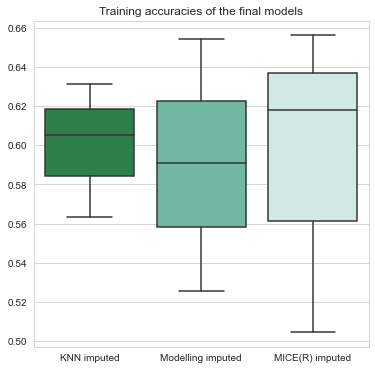

In [87]:
plt.figure(figsize=(6,6)) 
sns.set_style("whitegrid") 
sns.boxplot(data=results, palette="BuGn_r") 
plt.savefig('results.png') 
plt.title('Training accuracies of the final models') 
plt.show() 

- we can clearly observe the KNN imputed dataset has better and consistent performance over other models.
- Hence Knn imputed dataset with gradient boosting algorithm model will be considered for final model.
- Training accuracy:60
- Testing accuracy:63

#### Predicting the validation data

In [139]:
#A dataset with no target variable was seperated from the data for validation purpose. 
Validation=pd.read_excel('validation_present_KNN.xlsx')

In [140]:
#miscellanous features were dropped which were not required for modelling.
Validation.drop(columns=['Unnamed: 0','ID'],inplace=True)

In [147]:
predicted = GBoost_signi.predict(Validation[sigini_vars])

In [150]:
Validation['Spending type']=predicted

In [151]:
#Validation.to_excel('Predicted_spending_class.xlsx')